# 2018 Geohackweek participant selection

### A. Arendt and L. Setiawan, May 2, 2018

### Using the [entrofy](https://github.com/dhuppenkothen/entrofy) library designed by Daniela Huppenkothen

#### Note: this code runs in Python 2.7

In [157]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import entrofy
import entrofy.mappers
import entrofy.core

import six
import itertools

seed = 20180508

### Read in the raw data from jotform

In [158]:
df = pd.DataFrame.from_csv('Geo-Hackweek-2018-Workshop-On-Geospatial-Data-Science.csv')
df.reset_index(drop=True, inplace=True)

/home/arendta/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


### rename and rearrange the columns

In [159]:
pc_col = ['first_name', 
          'last_name', 
          'email', 
          'birth_date', 
          'academic_institution', 
          'city', 
          'state', 
          'country', 
          'position', 
          'grad_program', 
          # Never heard of this language
          'never_python', 
          'never_r', 
          'never_julia', 
          'never_sql', 
          'never_java', 
          'never_js', 
          'never_c_cp', 
          'never_stata_sas', 
          'never_shell', 
          'never_other',
          # Heard of this language, but never used it
          'heard_python', 
          'heard_r', 
          'heard_julia', 
          'heard_sql', 
          'heard_java', 
          'heard_js', 
          'heard_c_cp', 
          'heard_stata_sas', 
          'heard_shell', 
          'heard_other',
          # Print "Hello world!" to console
          'print_python', 
          'print_r', 
          'print_julia', 
          'print_sql', 
          'print_java', 
          'print_js', 
          'print_c_cp', 
          'print_stata_sas', 
          'print_shell', 
          'print_other',
          # Write any function
          'func_python', 
          'func_r', 
          'func_julia', 
          'func_sql', 
          'func_java', 
          'func_js', 
          'func_c_cp', 
          'func_stata_sas', 
          'func_shell', 
          'func_other',
          # Read data from tab-delimited file
          'read_tsv_python', 
          'read_tsv_r', 
          'read_tsv_julia', 
          'read_tsv_sql', 
          'read_tsv_java', 
          'read_tsv_js', 
          'read_tsv_c_cp', 
          'read_tsv_stata_sas', 
          'read_tsv_shell', 
          'read_tsv_other',
          # Import a library or package
          'import_python', 
          'import_r', 
          'import_julia', 
          'import_sql', 
          'import_java', 
          'import_js', 
          'import_c_cp', 
          'import_stata_sas', 
          'import_shell', 
          'import_other',
          # Produce a plot or graph
          'plot_python', 
          'plot_r', 
          'plot_julia', 
          'plot_sql', 
          'plot_java', 
          'plot_js', 
          'plot_c_cp', 
          'plot_stata_sas', 
          'plot_shell', 
          'plot_other',
          # Scrape a web page
          'webscrape_python', 
          'webscrape_r', 
          'webscrape_julia', 
          'webscrape_sql', 
          'webscrape_java', 
          'webscrape_js', 
          'webscrape_c_cp', 
          'webscrape_stata_sas', 
          'webscrape_shell', 
          'webscrape_other',
          # Train statistical or machine learning model
          'ml_python', 
          'ml_r', 
          'ml_julia', 
          'ml_sql', 
          'ml_java', 
          'ml_js', 
          'ml_c_cp', 
          'ml_stata_sas', 
          'ml_shell', 
          'ml_other',
          # Work with > 1TB of data
          'bigdata_python', 
          'bigdata_r', 
          'bigdata_julia', 
          'bigdata_sql', 
          'bigdata_java', 
          'bigdata_js', 
          'bigdata_c_cp', 
          'bigdata_stata_sas', 
          'bigdata_shell', 
          'bigdata_other',
          # Develop a complex application or module
          'module_python', 
          'module_r', 
          'module_julia', 
          'module_sql', 
          'module_java', 
          'module_js', 
          'module_c_cp', 
          'module_stata_sas', 
          'module_shell', 
          'module_other',
          # Documented and released production code intended for use by ...
          'release_python', 
          'release_r', 
          'release_julia', 
          'release_sql', 
          'release_java', 
          'release_js', 
          'release_c_cp', 
          'release_stata_sas', 
          'release_shell', 
          'release_other',
          # Contributed to community-supported open-source project
          'contributor_python', 
          'contributor_r', 
          'contributor_julia', 
          'contributor_sql', 
          'contributor_java', 
          'contributor_js', 
          'contributor_c_cp', 
          'contributor_stata_sas', 
          'contributor_shell', 
          'contributor_other', 
          'other_language', 
          'github', 
          'data_analyzed', 
          'why_participate', 
          'source', 
          'cv_link', 
          'travel_grant', 
          'gender_minor', 
          'race_minor', 
          'sig_first', 
          'sig_last', 
          'date']

In [160]:
df.columns = pc_col

In [161]:
df2 = df.copy()

In [162]:
df2.loc[:, 'never_heard'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'never' in k]), axis=1)
df2.loc[:, 'have_heard_never_use'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'heard' in k]), axis=1)
df2.loc[:, 'print_hello_world'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'print' in k]), axis=1)
df2.loc[:, 'write_func'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'func' in k]), axis=1)
df2.loc[:, 'read_tsv'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'read_tsv' in k]), axis=1)
df2.loc[:, 'import_lib'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'import' in k]), axis=1)
df2.loc[:, 'webscraping'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'webscrape' in k]), axis=1)
df2.loc[:, 'plotting'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'plot' in k]), axis=1)
df2.loc[:, 'machine_learning'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'ml' in k]), axis=1)
df2.loc[:, 'bigdata'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'bigdata' in k]), axis=1)
df2.loc[:, 'dev_module'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'module' in k]), axis=1)
df2.loc[:, 'release'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'release' in k]), axis=1)
df2.loc[:, 'oss_contributor'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'contributor' in k]), axis=1)

In [163]:
df2 = df2.drop([# Never heard of this language
          'never_python', 
          'never_r', 
          'never_julia', 
          'never_sql', 
          'never_java', 
          'never_js', 
          'never_c_cp', 
          'never_stata_sas', 
          'never_shell', 
          'never_other',
          # Heard of this language, but never used it
          'heard_python', 
          'heard_r', 
          'heard_julia', 
          'heard_sql', 
          'heard_java', 
          'heard_js', 
          'heard_c_cp', 
          'heard_stata_sas', 
          'heard_shell', 
          'heard_other',
          # Print "Hello world!" to console
          'print_python', 
          'print_r', 
          'print_julia', 
          'print_sql', 
          'print_java', 
          'print_js', 
          'print_c_cp', 
          'print_stata_sas', 
          'print_shell', 
          'print_other',
          # Write any function
          'func_python', 
          'func_r', 
          'func_julia', 
          'func_sql', 
          'func_java', 
          'func_js', 
          'func_c_cp', 
          'func_stata_sas', 
          'func_shell', 
          'func_other',
          # Read data from tab-delimited file
          'read_tsv_python', 
          'read_tsv_r', 
          'read_tsv_julia', 
          'read_tsv_sql', 
          'read_tsv_java', 
          'read_tsv_js', 
          'read_tsv_c_cp', 
          'read_tsv_stata_sas', 
          'read_tsv_shell', 
          'read_tsv_other',
          # Import a library or package
          'import_python', 
          'import_r', 
          'import_julia', 
          'import_sql', 
          'import_java', 
          'import_js', 
          'import_c_cp', 
          'import_stata_sas', 
          'import_shell', 
          'import_other',
          # Produce a plot or graph
          'plot_python', 
          'plot_r', 
          'plot_julia', 
          'plot_sql', 
          'plot_java', 
          'plot_js', 
          'plot_c_cp', 
          'plot_stata_sas', 
          'plot_shell', 
          'plot_other',
          # Scrape a web page
          'webscrape_python', 
          'webscrape_r', 
          'webscrape_julia', 
          'webscrape_sql', 
          'webscrape_java', 
          'webscrape_js', 
          'webscrape_c_cp', 
          'webscrape_stata_sas', 
          'webscrape_shell', 
          'webscrape_other',
          # Train statistical or machine learning model
          'ml_python', 
          'ml_r', 
          'ml_julia', 
          'ml_sql', 
          'ml_java', 
          'ml_js', 
          'ml_c_cp', 
          'ml_stata_sas', 
          'ml_shell', 
          'ml_other',
          # Work with > 1TB of data
          'bigdata_python', 
          'bigdata_r', 
          'bigdata_julia', 
          'bigdata_sql', 
          'bigdata_java', 
          'bigdata_js', 
          'bigdata_c_cp', 
          'bigdata_stata_sas', 
          'bigdata_shell', 
          'bigdata_other',
          # Develop a complex application or module
          'module_python', 
          'module_r', 
          'module_julia', 
          'module_sql', 
          'module_java', 
          'module_js', 
          'module_c_cp', 
          'module_stata_sas', 
          'module_shell', 
          'module_other',
          # Documented and released production code intended for use by ...
          'release_python', 
          'release_r', 
          'release_julia', 
          'release_sql', 
          'release_java', 
          'release_js', 
          'release_c_cp', 
          'release_stata_sas', 
          'release_shell', 
          'release_other',
          # Contributed to community-supported open-source project
          'contributor_python', 
          'contributor_r', 
          'contributor_julia', 
          'contributor_sql', 
          'contributor_java', 
          'contributor_js', 
          'contributor_c_cp', 
          'contributor_stata_sas', 
          'contributor_shell', 
          'contributor_other'], axis='columns')

In [164]:
df3 = df.copy()

### assign a numeric score to the different levels of coding skill

In [165]:
exp_score = {
    'never': 0,
    'heard': 1,
    'print': 2,
    'func': 3,
    'read_tsv': 4,
    'import': 5,
    'plot': 6,
    'webscrape': 7,
    'ml': 8,
    'bigdata': 9,
    'module': 10,
    'release': 11,
    'contributor': 12
}

In [166]:
languages = {
    'python': 'Python',
    'r': 'R',
    'julia': 'Julia',
    'sql': 'SQL',
    'java': 'Java',
    'js': 'JavaScript',
    'c_cp': 'C/C++',
    'stata_sas': 'Stata/SAS',
    'shell': 'Shell scripting, e.g, bash',
    'other': 'Other'
}

### combine datasets used into a smaller number of categories

In [167]:
fields = {
    'social': ['Urban', 'Demographic', 'Geopolitical'],
    'hydro_climate': ['Water resources', 'Climatic/atmospheric'],
    'ocean': ['Oceanographic'],
    'geophysics': ['Cryospheric',  'Geophysical / solid earth'],
    'ecosystem': ['Biological / Ecological', 'Land use / conservation']
}

In [168]:
def score(lang, person):
    score = []
    for c in person.keys():
        if lang in c:
            if person[c] == languages[lang]:
                score.append(exp_score[c.replace('_{}'.format(lang), '')])
    return sum(score)

In [169]:
for k, v in languages.items():
    df3.loc[:, k] = df3.apply(lambda person: score(k, person), axis=1)

In [170]:
for k, v in fields.items():
    df3.loc[:, k] = df3['data_analyzed'].str.contains('|'.join(v)) * 1
df3.loc[:, 'other_field'] = ~df3['data_analyzed'].str.contains('|'.join(list(itertools.chain.from_iterable([v for k, v in fields.items()])))) * 1

In [171]:
df3 = df3.drop([# Never heard of this language
          'never_python', 
          'never_r', 
          'never_julia', 
          'never_sql', 
          'never_java', 
          'never_js', 
          'never_c_cp', 
          'never_stata_sas', 
          'never_shell', 
          'never_other',
          # Heard of this language, but never used it
          'heard_python', 
          'heard_r', 
          'heard_julia', 
          'heard_sql', 
          'heard_java', 
          'heard_js', 
          'heard_c_cp', 
          'heard_stata_sas', 
          'heard_shell', 
          'heard_other',
          # Print "Hello world!" to console
          'print_python', 
          'print_r', 
          'print_julia', 
          'print_sql', 
          'print_java', 
          'print_js', 
          'print_c_cp', 
          'print_stata_sas', 
          'print_shell', 
          'print_other',
          # Write any function
          'func_python', 
          'func_r', 
          'func_julia', 
          'func_sql', 
          'func_java', 
          'func_js', 
          'func_c_cp', 
          'func_stata_sas', 
          'func_shell', 
          'func_other',
          # Read data from tab-delimited file
          'read_tsv_python', 
          'read_tsv_r', 
          'read_tsv_julia', 
          'read_tsv_sql', 
          'read_tsv_java', 
          'read_tsv_js', 
          'read_tsv_c_cp', 
          'read_tsv_stata_sas', 
          'read_tsv_shell', 
          'read_tsv_other',
          # Import a library or package
          'import_python', 
          'import_r', 
          'import_julia', 
          'import_sql', 
          'import_java', 
          'import_js', 
          'import_c_cp', 
          'import_stata_sas', 
          'import_shell', 
          'import_other',
          # Produce a plot or graph
          'plot_python', 
          'plot_r', 
          'plot_julia', 
          'plot_sql', 
          'plot_java', 
          'plot_js', 
          'plot_c_cp', 
          'plot_stata_sas', 
          'plot_shell', 
          'plot_other',
          # Scrape a web page
          'webscrape_python', 
          'webscrape_r', 
          'webscrape_julia', 
          'webscrape_sql', 
          'webscrape_java', 
          'webscrape_js', 
          'webscrape_c_cp', 
          'webscrape_stata_sas', 
          'webscrape_shell', 
          'webscrape_other',
          # Train statistical or machine learning model
          'ml_python', 
          'ml_r', 
          'ml_julia', 
          'ml_sql', 
          'ml_java', 
          'ml_js', 
          'ml_c_cp', 
          'ml_stata_sas', 
          'ml_shell', 
          'ml_other',
          # Work with > 1TB of data
          'bigdata_python', 
          'bigdata_r', 
          'bigdata_julia', 
          'bigdata_sql', 
          'bigdata_java', 
          'bigdata_js', 
          'bigdata_c_cp', 
          'bigdata_stata_sas', 
          'bigdata_shell', 
          'bigdata_other',
          # Develop a complex application or module
          'module_python', 
          'module_r', 
          'module_julia', 
          'module_sql', 
          'module_java', 
          'module_js', 
          'module_c_cp', 
          'module_stata_sas', 
          'module_shell', 
          'module_other',
          # Documented and released production code intended for use by ...
          'release_python', 
          'release_r', 
          'release_julia', 
          'release_sql', 
          'release_java', 
          'release_js', 
          'release_c_cp', 
          'release_stata_sas', 
          'release_shell', 
          'release_other',
          # Contributed to community-supported open-source project
          'contributor_python', 
          'contributor_r', 
          'contributor_julia', 
          'contributor_sql', 
          'contributor_java', 
          'contributor_js', 
          'contributor_c_cp', 
          'contributor_stata_sas', 
          'contributor_shell', 
          'contributor_other'], axis='columns')

### Combine career stage into a smaller number of categories

In [172]:
df3.replace(to_replace = {'position':{'Graduate/postgraduate student':'grad_postgrad',
                                      'PhD':'grad_postgrad',
                                      'Postdoc':'grad_postgrad',
                                      'Undergraduate/college student':'undergrad',
                                      'Research Staff':'Faculty',
                                      'Self-employed':'other',
                                      'Freelance':'other',
                                      'Machine Learning Certification':'other',
                                      'NGO':'other',
                                      'Self-employed consultant':'other'
                                      }}, inplace=True)
df3['position'].unique()

array(['grad_postgrad', 'undergrad', 'Faculty', 'other', 'Government',
       'Industry'], dtype=object)

In [173]:
#for k, v in career.items():
#    df3.loc[:, k] = df3['position'].str.contains('|'.join(v)) * 1

### Additional cleaning to handle variations in Country listing, and create a new category to partition out US versus non-US applicants

In [174]:
df3.replace(to_replace = {'country':{'United States':'USA',
                                         'U.S.A':'USA',
                                         'U.S.':'USA',
                                         'King':'USA',
                                         'US':'USA',
                                         'United States ':'USA',
                                         'United States of America':'USA',
                                         '98105':'USA',
                                         '98122':'USA',
                                         'M\xc3\xa9xico':'Mexico'
                                          }}, inplace = True)
df3['country'].unique()

array(['USA', 'India', 'Israel', 'United Kingdom', 'Norway', 'Mexico',
       'Australia', 'South Africa', 'Canada'], dtype=object)

In [175]:
df3['USA'] = df3.apply(lambda row: 1 if row['country'] == 'USA' else 0, axis=1)

#### calculate age

In [176]:
#df3.loc[:,'age'] = df3.apply(lambda row: (pd.Timestamp.today() - pd.to_datetime(row['birth_date'], format='%m/%d/%Y', errors='ignore')).days / 365, axis=1)

### clean up academic institution, and create a new category to partition out UW versus non-UW applicants

In [177]:
df3.replace(to_replace = {'academic_institution':{'UW':'University of Washington',
                                                 'Applied Physics Laboratory at University of Washington':'University of Washington',
                                                 'University Of Washington':'University of Washington',
                                                 'University of Washington ':'University of Washington'}}, inplace = True)

In [178]:
df3['atUW'] = df3.apply(lambda row: 1 if row['academic_institution'] == 'University of Washington' else 0, axis=1)

### some functions to generate plots

In [179]:
def make_plot_categorical(column_str):
    ax = entrofy.plotting.plot_distribution(df3, column_str,
                                        xtype="categorical",
                                        cmap="YlGnBu", ax=None)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation='vertical')

def make_plot_continuous(column_str):
    ax = entrofy.plotting.plot_distribution(df3, column_str,
                                        xtype="continuous",
                                        cmap="YlGnBu", ax=None)

### Academic Institution?

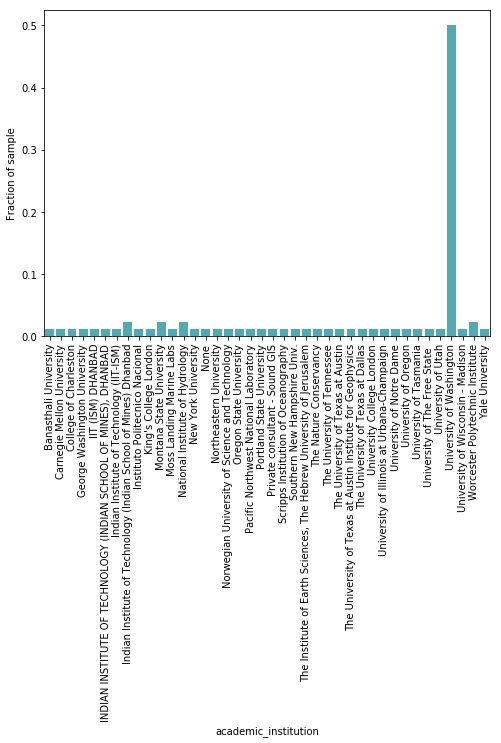

In [180]:
make_plot_categorical('academic_institution')

### What is your current geographical location?

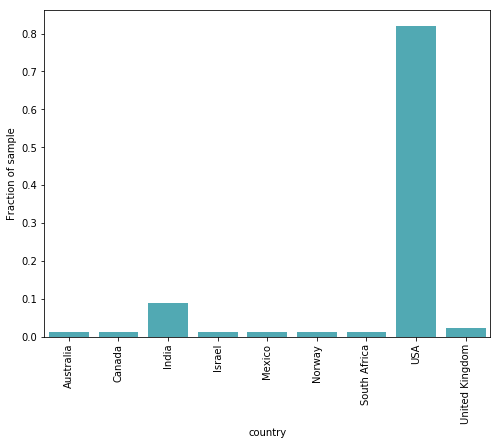

In [181]:
make_plot_categorical('country')

### What is your current position?

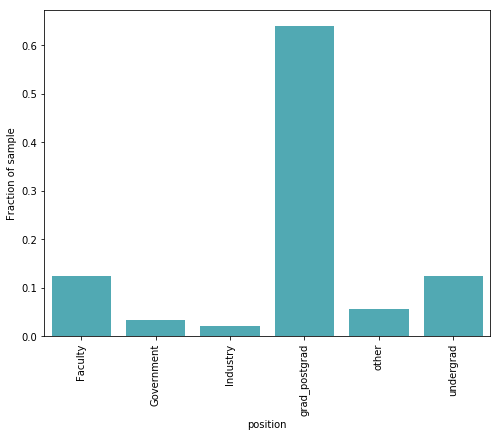

In [182]:
make_plot_categorical('position')

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

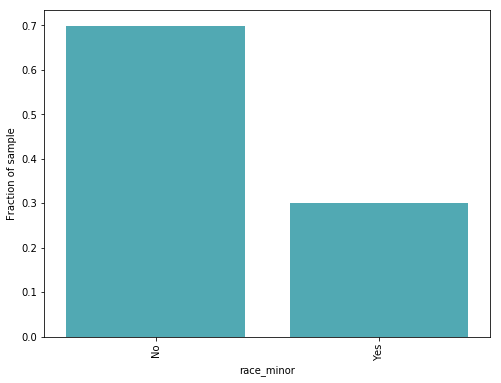

In [183]:
make_plot_categorical('race_minor')

### In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?

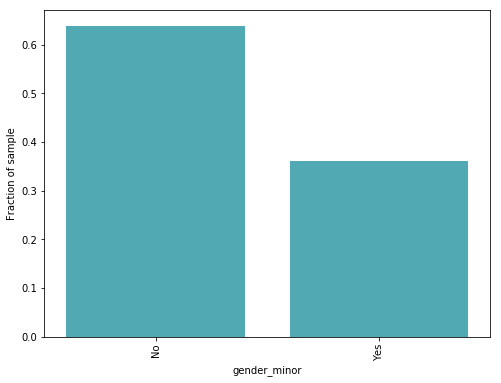

In [184]:
make_plot_categorical('gender_minor')

### Will you be likely to need financial support from us to attend Geo Hackweek?

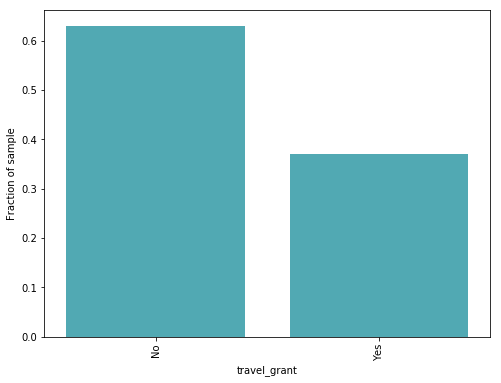

In [185]:
make_plot_categorical('travel_grant')

### Python coding skill

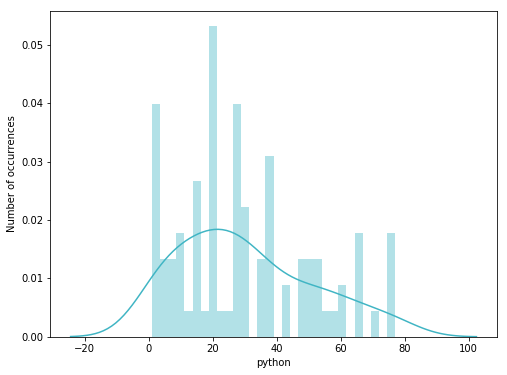

In [186]:
make_plot_continuous('python')

### at a US institution?

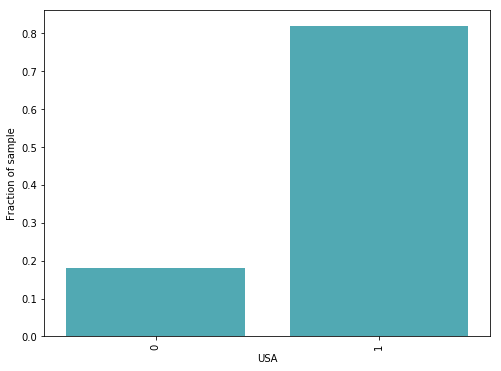

In [187]:
make_plot_categorical('USA')

## At UW?

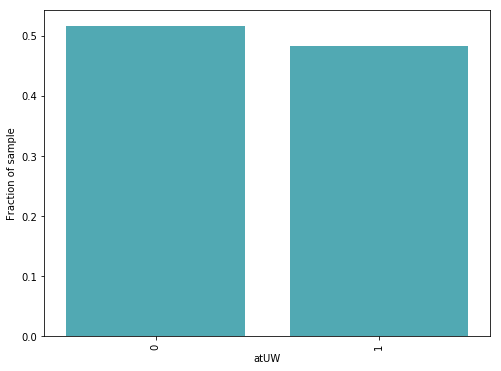

In [188]:
make_plot_categorical('atUW')

## Running entrofy

### define categories for consideration and weights

In [189]:
weights = {
           'gender_minor': 1.0,
           'race_minor': 1.0,
           'python': 1.0,
           'USA': 1.0,
           'atUW': 1.0,
           'other_field': 1.0,
           'position': 1.0
#           'social': 1.0,
#           'hydro_climate': 1.0,
#           'ocean': 1.0,
#           'geophysics': 1.0,
#           'ecosystem': 1.0
          }

datatypes = {
             'gender_minor': 'categorical',
             'race_minor': 'categorical',
             'python': 'continuous',
             'USA': 'categorical',
             'atUW': 'categorical',
             'other_field': 'categorical',
             'position': 'categorical'
#             'social': 'categorical',
#             'hydro_climate': 'categorical',
#             'ocean': 'categorical',
#             'geophysics': 'categorical',
#             'ecosystem': 'categorical'
             }


In [190]:
mappers = entrofy.core.construct_mappers(df3, weights, datatypes)

In [191]:
# label mappers to avoid confusion in merging dataframe columns later
mappers['gender_minor'].prefix = 'gender'
mappers['race_minor'].prefix = 'race'
#mappers['python'].prefix = 'python'
mappers['USA'].prefix = 'USA'
mappers['atUW'].prefix = 'atUW'
mappers['other_field'].prefix = 'other_field'
mappers['position'].prefix = 'position'

#mappers['social'].prefix = 'social'
#mappers['hydro_climate'].prefix = 'hydro_climate'
#mappers['ocean'].prefix = 'ocean'
#mappers['geophysics'].prefix = 'geophysics'
#mappers['ecosystem'].prefix = 'ecosystem'

### Set desired targets in the distribuion for accepted applicants 

#### first, assess how many missing values there are in some of the responses since this will affect how we set the target thresholds

In [192]:
print('missing responses in racial minority question')
print(df3['race_minor'].isnull().sum().sum())
print('missing responses in gender minority question')
print(df3['gender_minor'].isnull().sum().sum())

missing responses in racial minority question
16
missing responses in gender minority question
17


### We performed an initial screening asking: "will this applicant make a positive contribution to geohackweek?" No responses are removed here.

In [193]:
opt_outs = [17, 18, 19, 23, 30, 31, 35, 39, 43, 49, 52, 57, 70, 77, 78]

In [194]:
#print("Percent of applicants who didn't respond to race/gender question")
16./74.

0.21621621621621623

In [195]:
# gender and race/ethnicity targets ("Do you consider yourself a minority..." 'NO'/'YES')

# 22% of applicants didn't respond to race/gender questions. 
# Therefore we don't want our targets to total to 100%
# Otherwise people who responded have an unfair advantage

new_targets = [0.45, 0.45]

sorted_keys = np.sort(list(mappers['gender_minor'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['gender_minor'].targets[key] = t

sorted_keys = np.sort(list(mappers['race_minor'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['race_minor'].targets[key] = t

# non-US versus US countries    
    
new_targets = [0.20, 0.80]
sorted_keys = np.sort(list(mappers['USA'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['USA'].targets[key] = t
    
# non-UW versus UW institutions    
    
new_targets = [0.50, 0.50]
sorted_keys = np.sort(list(mappers['atUW'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['atUW'].targets[key] = t

# career position (Faculty/Government/Industry/grad_postgrad/other/undergrad)  
    
new_targets = [0.10, 0.10, 0.10 ,0.50 ,0.10 ,0.10]
sorted_keys = np.sort(list(mappers['position'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['position'].targets[key] = t
    
# NO/YES worked with other geospatial data (effort to increase non-traditional geospatial fields)
    
new_targets = [0.90, 0.10] 
sorted_keys = np.sort(list(mappers['other_field'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['other_field'].targets[key] = t


### Python skill level is the only continuous field. Here we use the default distribution, targeting 1/3 in equally-distributed numeric bins

In [196]:
#mappers['python'].targets

In [197]:
#mappers['python'].boundaries = [1., 20., 55., 77.]

In [198]:
Python_boundaries = [0.0, 20.0, 30.0, 40.0, 80.0]
Python_targets = {"0-20":0.25, "20-30":0.25, "30-40":0.25, "40-80":0.25}
Python_column_names = ["0-20", "20-30", "30-40", "40-80"]
mappers['python'] = entrofy.mappers.ContinuousMapper(df3["python"], n_out=4,
                                             boundaries=Python_boundaries,
                                             targets=Python_targets, column_names = Python_column_names)

In [199]:
mappers

{'USA': <entrofy.mappers.ObjectMapper at 0x7f5619dd19d0>,
 'atUW': <entrofy.mappers.ObjectMapper at 0x7f5619dd1b10>,
 'gender_minor': <entrofy.mappers.ObjectMapper at 0x7f5619dd1f50>,
 'other_field': <entrofy.mappers.ObjectMapper at 0x7f5619dd1e10>,
 'position': <entrofy.mappers.ObjectMapper at 0x7f5619dd1b50>,
 'python': <entrofy.mappers.ContinuousMapper at 0x7f562c58c8d0>,
 'race_minor': <entrofy.mappers.ObjectMapper at 0x7f5619dd12d0>}

In [200]:
idx, max_score = entrofy.core.entrofy(df3, 55,
                                      mappers=mappers,
                                      weights=weights,
                                      seed=seed,
                                      opt_outs = opt_outs)
print(max_score)

76.56448327207852


In [201]:
df_out = df3.loc[idx]

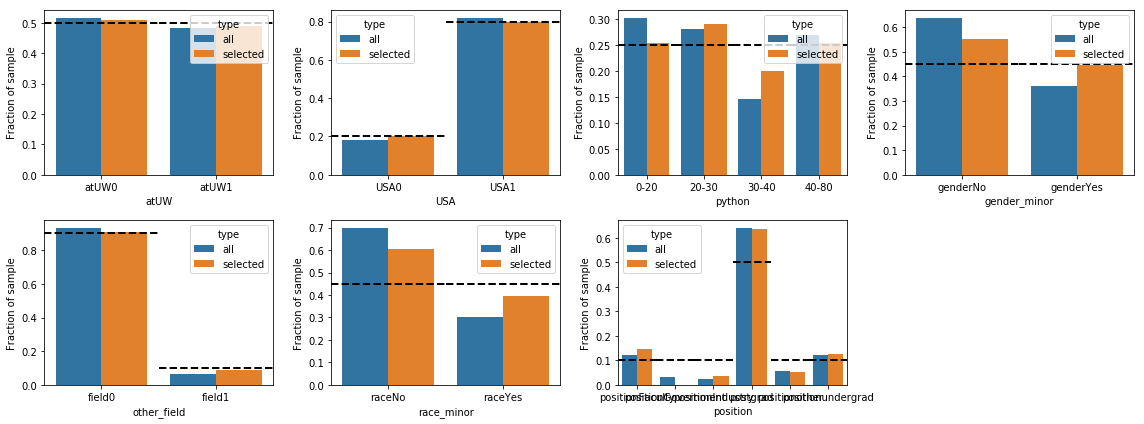

In [202]:
_ = entrofy.plotting.plot(df3, idx, weights, mappers=mappers, cols=4)

### plotting career position so it is easier to see

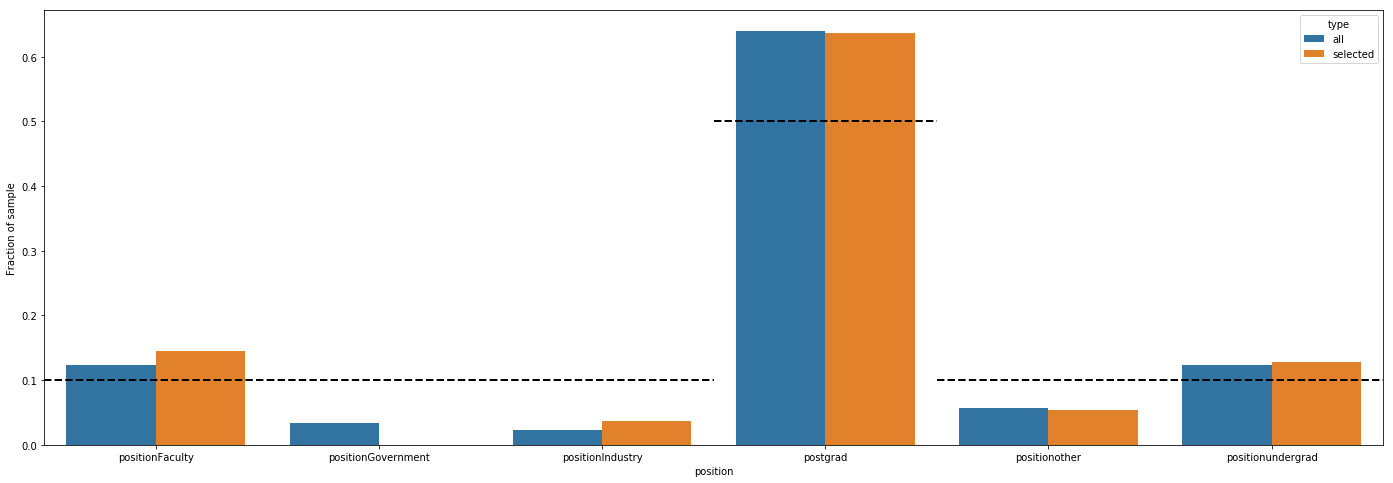

In [203]:
_, _ = entrofy.plotting.plot_fractions(df3["position"], idx,
                                       "position", mappers["position"])

In [204]:
df3.loc[set(idx), 'accepted'] = 'YES'
df3.loc[set(df3.index) - set(idx), 'accepted'] = 'NO'

In [206]:
df3[['first_name','last_name','country','academic_institution',
     'gender_minor','race_minor',
     'travel_grant','accepted']].to_csv('final.csv')

In [ ]:
#df3[['first_name','last_name','travel_grant']].loc[idx].to_csv('accepted.csv')

In [ ]:
#df3.loc[set(df3.index) - set(idx)].to_csv('rejected.csv')